In [1]:
# NO CODE 

from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

(ch5.4)=
## Unbiased Estimators ##

Data scientists often use information in random samples to estimate unknown numercial quantities. For example, they might estimate the unknown average income in a large population by using incomes in a random sample drawn from the population. In this section we will examine one criterion for a good estimate.

First let's note a straightforward but extremely handy property of expectation.

### Preliminary: Linear Function Rule ###

Let $X$ be a random variable and let $Y = aX + b$. Then $Y$ is a linear function of $X$. By our method for finding the expectation of a function of a random variable, 

$$
\begin{align*}
E(Y) ~ = ~ E(aX + b) ~ &= ~ \sum_{\text{all }x} (ax+b)P(X=x) \\
&= ~ a\sum_{\text{all }x} xP(X=x) ~ + ~ b \sum_{\text{all }x} P(X=x) \\
&= ~ aE(X) + b
\end{align*}
$$

Thus the *linear function rule* is that the expectation of a linear function of a random variable is equal to the linear function of the expectation. 

This switching of functions and expectations is in general false for non-linear functions, as we saw earlier. But the fact that it is true for linear functions makes calculations easier. 

For example, $E(10 - X) = 10 - E(X)$, $E((X-2)/3) = (E(X)-2)/3$, and so on.

### Terminology ###

In the context of estimation, a *parameter* is a fixed number associated with the population. That's the same as the way we have used the term before: the parameter is a constant in the distribution of each sampled element.

For example, if the population consists of all U.S. adults, the parameter could be the average annual income in the population. We will denote this parameter by $\mu$ for "mean". Data scientists commonly use $\mu$ to represent means, in vastly different contexts. When you read the description of a model or an analysis and see the notation $\mu$, make sure you understand exactly how it is defined in that context.

Now suppose you draw a random sample from the population. A *statistic* is any number computed based on the data in the sample. Thus for example the average income of the sampled people is a statistic.

In general, if $X_i$ represents the $i$th element in the sample, then a statistic is a function $g(X_1, X_2, \ldots, X_n)$. The sample average is the statistic $\bar{X}$ defined as the function

$$
\bar{X} ~ = ~ \frac{1}{n} \sum_{i=1}^n X_i
$$

One important difference between a parameter and a statistic, as they have been defined above, is that a parameter is a fixed but possibly unknown number, whereas a statistic is a random variable. The value of the statistic depends on the elements that get randomly selected to be in the sample.

In our example about incomes, the parameter $\mu$ is the average income in the whole population. Even if we don't know what it is, it's a fixed number. The statistic $\bar{X}$ is the average income in the sample. This is a random quantity since it depends on $X_1, X_2, \ldots, X_n$ which are all random variables.

If a statistic is being used to estimate a parameter, the statistic is sometimes called an *estimator* of the parameter.

Thus if you use the sample mean $\bar{X}$ to estimate the population mean $\mu$, then $\bar{X}$ is an estimator of $\mu$.

This section is about a property that is often – but not always – considered desirable in an estimator.

### Unbiased Estimator ###

An unbiased estimator of a parameter is an estimator whose expected value is equal to the parameter.

That is, if the estimator $S$ is being used to estimate a parameter $\theta$, then $S$ is an unbiased estimator of $\theta$ if $E(S) = \theta$.

Remember that expectation can be thought of as a long-run average value of a random variable. If an estimator $S$ is unbiased, then on average it is equal to the number it is trying to estimate. Here "on average" involves imagining repeated samples, as follows:

- Draw one random sample; compute the value of $S$ based on that sample.
- Draw another random sample of the same size, independently of the first one; compute the value of $S$ based on this sample.
- Repeat the step above as many times as you can.
- You will now have lots of observed values of $S$.

If $S$ is an unbiased estimator of $\theta$, then on average, these values will neither be greater than $\theta$ nor smaller than $\theta$. On average in the long run they will be just right: equal to $\theta$.

This seems like a good property for an estimator to have. In many settings, natural estimators turn out to be unbiased. Let's look at some examples.

### Sample Mean ###

Suppose you want to estimate the mean of a population based on a sample $X_1, X_2, \ldots, X_n$ drawn at random with replacement from the population.

It is natural to want to use the sample mean $\bar{X}$ as an estimator of the population mean $\mu$. To see whether $\bar{X}$ is an unbiased estimator of $\mu$ we have to calculate its expectation. We can do this by using the linear function rule and additivity.

$$
E(\bar{X}) ~ = ~ E\big{(} \frac{1}{n}\sum_{i=1}^n X_i \big{)} ~ = ~ \frac{1}{n}\sum_{i=1}^n E(X_i) ~ = ~ \frac{1}{n} \cdot n\mu ~ = ~ \mu
$$

Thus $\bar{X}$ is an unbiased estimator of $\mu$.

Notice that in the calculation above we have also discovered many other unbiased estimators of $\mu$.

For example, $X_1$ is an unbiased estimator of $\mu$ because $E(X_1) = \mu$. Indeed if you fix any $i$ then $X_i$ is an unbiased estimator of $\mu$. 

Even though both $\bar{X}$ and $X_1$ are unbiased estimators, it seems like a better idea to use $\bar{X}$ to estimate $\mu$ than to use just $X_1$. Why throw away the rest of the data?

This intution is correct: it is indeed better to use $\bar{X}$, because it is likely to be closer to $\mu$ than $X_1$. We will show this later in the course. For now, just note that the same sample can be used to construct more than one unbiased estimator for the parameter.

### Sample Proportion ###

An important special case of the sample mean is when the population consists of zeros and ones. 

You know that the sum of a sequence of zeros and ones is equal to the number of ones in the sequence. It follows that the average of a sequence of zeros and ones is the proportion of ones in the sequence.

Suppose a population has a proportion $p$ of ones and $1-p$ of zeros. Then the mean of the population is $p$, the population proportion of ones.

Let $X_1, X_2, \ldots, X_n$ be draws at random with replacement from the population. Then $X_1, X_2, \ldots, X_n$ are independent identically distributed indicator random variables, each with chance $p$ of being 1. 

The sample mean $\bar{X}$ is the *sample proportion* of ones, and is an unbiased estimator of the population proportion of ones.

Note that in this case the *sample sum* $S_n = X_1 + X_2 + \ldots + X_n$ is the number of ones in the sample and has the binomial $(n, p)$ distribution. The sample mean is $\bar{X} = S_n/n$. 

The graph below shows the relation between the sample proportion $\bar{X}$ and the population proportion $p$ in an example.

Suppose you roll a die 30 times and find the sample proportion of sixes. The histogram below shows the results of 20,000 repetitions of this experiment. On average, the 20,000 sample proportions are almost indistinguishable from $p = 1/6$.

n = 30
p = 0.1667
Average of observed sample proportions = 0.167


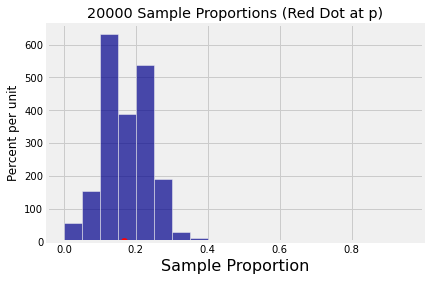

In [2]:
# NO CODE

# sample size and p
n = 30
p = 1/6

# number of times to repeat the experiment
repetitions = 20000

# simulated sample sum and sample proportion
sim_S_n = stats.binom.rvs(n, p, size=repetitions)
sim_X_bar = sim_S_n / n

# graphics
Table().with_columns('Sample Proportion', sim_X_bar).hist(0, bins=np.arange(0, 1, 0.05))
plt.scatter(p, 0, color='red', s=40)
ave = np.mean(sim_X_bar)
print('n =', n)
print('p =', str(round(p,4)))
print('Average of observed sample proportions =', round(ave, 4))
plt.title(str(repetitions)+' Sample Proportions (Red Dot at p)');

### Estimating the Largest Possible Value ###

Suppose $X_1, X_2, \ldots, X_n$ are independent and identically distributed (i.i.d.), each uniform on $1, 2, 3, \ldots, N$ for some fixed but unknown $N$. Let us construct an unbiased estimator of $N$.

The population mean is $(N+1)/2$. If $\bar{X}$ is the sample mean then

$$
E(\bar{X}) ~ = ~ \frac{N+1}{2}
$$

so $\bar{X}$ is not an unbiased estimator of $N$. We wouldn't expect it to be, because $N$ is the largest any of the sampled elements could be whereas $\bar{X}$ is likely to be somewhere in the middle of the sample.

But we can see that

$$
2E(\bar{X}) - 1 ~ = ~ N
$$

By the linear function rule,

$$
2E(\bar{X}) - 1 ~ = ~ E(2\bar{X} - 1)
$$

So the statistic $T = 2\bar{X} - 1$ is an unbiased estimator of $N$.

(ch5.4.7)=
### World War II Tanks ###

The calculation above stems from a problem the Allied forces faced in World War II. Germany had a seemingly never-ending fleet of Panzer tanks, and the Allies needed to estimate how many they had. They decided to base their estimates on the serial numbers of the tanks that they saw.

Here is a picture of one from [Wikipedia](https://en.wikipedia.org/wiki/Panzer_IV).

![Panzer Tank](../images/panzer.png)

Notice the serial number on the top left. When tanks were disabled or destroyed, it was discovered that their parts had serial numbers too. The ones from the gear boxes proved very useful.

The idea was to model the observed serial numbers as random draws from $1, 2, \ldots, N$ and then estimate $N$. This is of course a very simplified model of reality, and we will make some additional simplifications. But estimates based on even such simple probabilistic models proved to be quite a bit [more accurate](https://en.wikipedia.org/wiki/German_tank_problem#Specific_data) than those based on the intelligence gathered by the Allies. For example, in August 1942, intelligence estimates were that Germany was producing 1,550 tanks per month. The prediction based on the probability model was 327 per month. After the war, German records showed that the actual production rate was 342 per month.

The model was that the draws were made at random without replacement from the integers 1 through $N$. But for even more simplicity, let's pretend that the draws were made with replacement. That is, if we saw the same tank twice then we would record it twice.

In the example above, we constructed the random variable $T$ to be an unbiased estimator of $N$.

The Allied statisticians instead started with $M$, the sample maximum:

$$
M ~ = ~ \max\{X_1, X_2, \ldots, X_n\}
$$

The sample maximum $M$ is not an unbiased estimator of $N$, because we know that its value is always less than or equal to $N$. Its average value therefore will be somewhat less than $N$.

But how much less? The histograms below show a comparison of the two estimates in the case where $N=300$ and the sample size is $n=30$, based on 5,000 repetitions of the sampling process. Of course the Allies didn't know $N$. But simulating the sample for "pretend" values of $N$ helps us understand how the estimators behave.

N = 300
n = 30
5000 repetitions


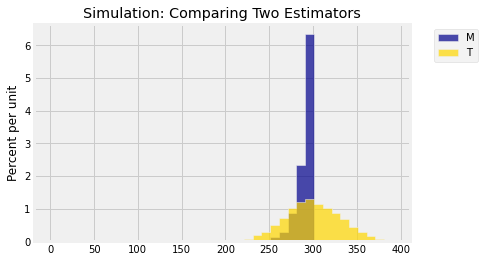

In [3]:
# NO CODE 

N = 300
serialno = Table().with_column('Serial Number', np.arange(1, N+1))
sample_size = 30
repetitions = 5000

maxes = make_array()
twice_ave = make_array()

for i in np.arange(repetitions):
    sampled_numbers = serialno.sample(sample_size)
    
    new_max = sampled_numbers.column(0).max()
    maxes = np.append(maxes, new_max)
    
    new_twice_ave = 2*np.mean(sampled_numbers.column(0)) - 1
    twice_ave = np.append(twice_ave, new_twice_ave)
    
    
results = Table().with_columns(
    'Repetition', np.arange(1, repetitions+1),
    'M', maxes,
    'T', twice_ave
)
every_ten = np.arange(1, N+100, 10)
results
results.drop(0).hist(bins = every_ten)
print('N =', N)
print('n =', n)
print(repetitions, 'repetitions')
plt.title('Simulation: Comparing Two Estimators');

The histograms show that both estimators have pros and cons.

In one sense, $T$ looks like a better estimator than $M$.

- The gold histogram shows the simulated distribution of $T = 2\bar{X} - 1$. The histogram is centered at 300, which is $N$. That's because $T$ is an unbiased estimator of $N$.
- The blue histogram shows the simulated distribution of $M = \max\{X_1, X_2, \ldots, X_n\}$. This estimate is biased: the entire histogram is at or to the left of $N = 300$.

On the other hand:

- The distribution of $T$ is quite wide. The Allies would only see one sample, not 5,000 as have been simulated here. The graph shows that their estimate could be quite a bit too high or quite a bit too low, even though the average value of all 5,000 estimates is just about right.
- The distribution of $M$ is much narrower. Even though $M$ could be an under-estimate, it doesn't look as though it underestimates by much.

That is justification for using $M$ in place of $T$ even though $T$ is unbiased and $M$ is not. Unbiasedness is a good property, but so is low variability.

In many situations, such as this one, lower bias tends to go with higher variability and vice versa. Data scientists call this the *bias-variance tradeoff.* We will examine it more carefully later in the course.

The Allied statisticians did better than we have done here. They used sampling without replacement as their model, and then used symmetry in simple random sampling to estimate the gap between $M$ and $N$. Thus they got an even better estimate by adding that estimated gap to $M$. Their estimates were remarkably close to the actual production rates obtained from German records after the war.